In [75]:
import numpy as np
import matplotlib.pyplot as plt

In [76]:
def trans_m(a, alpha, d, theta):
    m = np.array([[np.cos(theta), -np.sin(theta), 0, a],
                  [np.cos(alpha)*np.sin(theta), np.cos(alpha)*np.cos(theta), -np.sin(alpha), -np.sin(alpha)*d],
                  [np.sin(alpha)*np.sin(theta), np.sin(alpha)*np.cos(theta),  np.cos(alpha),  np.cos(alpha)*d],
                  [0, 0, 0, 1]])
    return m

In [107]:
def draw(pos):
    xs = [e[0] for e in pos]
    ys = [e[1] for e in pos]
    zs = [e[2] for e in pos]
    
    fig = plt.figure(figsize=(7,7))
    
    sp = fig.add_subplot(221,aspect='equal')
    sp.set_xlim(-2,2)
    sp.set_ylim(-2,2)
    plt.plot(xs, ys,"-", color="skyblue", lw=5, label="link")
    plt.plot(xs, ys,"o", color="orange", ms=10, label="joint")
    plt.title("x-y")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.legend(fontsize=10)
    
    sp = fig.add_subplot(222,aspect='equal')
    sp.set_xlim(-2,2)
    sp.set_ylim(-2,2)
    plt.plot(ys, zs,"-", color="skyblue", lw=5, label="link")
    plt.plot(ys, zs,"o", color="orange", ms=10, label="joint")
    plt.title("y-z")
    plt.xlabel("y")
    plt.ylabel("z")
    plt.grid()
    plt.legend(fontsize=10)
    
    sp = fig.add_subplot(223,aspect='equal')
    sp.set_xlim(-2,2)
    sp.set_ylim(-2,2)
    plt.plot(xs, zs,"-", color="skyblue", lw=5, label="link")
    plt.plot(xs, zs,"o", color="orange", ms=10, label="joint")
    plt.title("x-z")
    plt.xlabel("x")
    plt.ylabel("z")
    plt.grid()
    plt.legend(fontsize=10)
    
    plt.tight_layout()
    plt.show()

In [121]:
theta = [np.pi/6, np.pi/6, np.pi/6]
tm0_1 = trans_m(0, 0,       0, theta[0])
tm1_2 = trans_m(0, np.pi/2, 0, theta[1])
tm2_3 = trans_m(1, 0,       0, theta[2])
tm3_4 = trans_m(1, 0,       0, 0)

In [122]:
pos = [tm0_1[0:3,3:4],
       tm0_1.dot(tm1_2)[0:3,3:4],
       tm0_1.dot(tm1_2).dot(tm2_3)[0:3,3:4],
       tm0_1.dot(tm1_2).dot(tm2_3).dot(tm3_4)[0:3,3:4]]

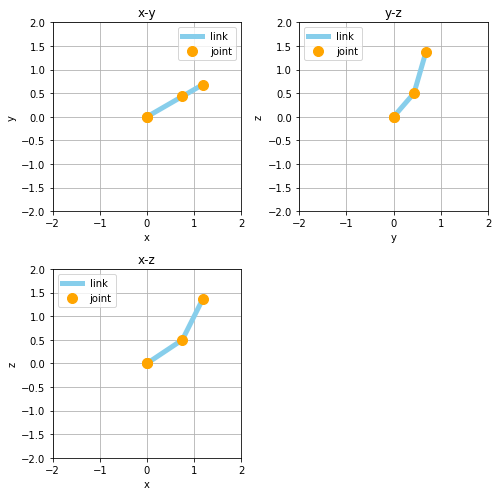

In [123]:
draw(pos)

In [ ]:
    xs = [e[0] for e in pos]
    ys = [e[1] for e in pos]
    zs = [e[2] for e in pos]
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
ax.set_zlim(-30,30)
ax.plot(pos[0:,0], pos[0:,1], pos[0:,2], "o", color="#00aa00", ms=4, mew=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()